In [39]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [5]:
a = np.linspace(0,99,100).reshape(10,10)
a

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69.],
       [70., 71., 72., 73., 74., 75., 76., 77., 78., 79.],
       [80., 81., 82., 83., 84., 85., 86., 87., 88., 89.],
       [90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]])

In [7]:
np.average(a, axis=0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [30]:
poisson.ppf(0.98, np.array([1.4,2.,3.,4.,5.]), loc=0)

array([ 4.,  5.,  7.,  9., 10.])

In [31]:
b = np.linspace(1,10,10)
b.shape

(10,)

In [10]:
def test():
    a = {}
    a["asdf"] = 1
    a["basdf"] = 2
    return a

In [18]:
b = test()
b.items()

dict_items([('asdf', 1), ('basdf', 2)])

In [13]:
for key, value in b.items:
    print(key, value)

TypeError: 'builtin_function_or_method' object is not iterable

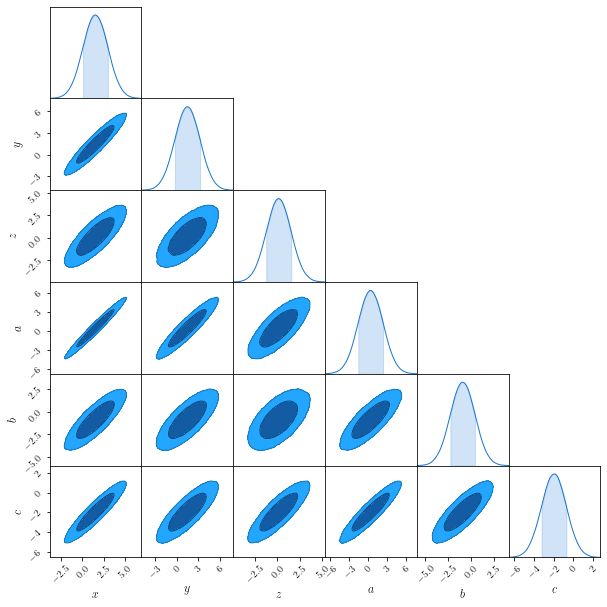

In [40]:
import numpy as np
from numpy.random import normal, random, multivariate_normal
from chainconsumer import ChainConsumer


np.random.seed(0)
cov = random(size=(6, 6))
data = multivariate_normal(normal(size=6), np.dot(cov, cov.T), size=200000)
parameters = ["$x$", "$y$", "$z$", "$a$", "$b$", "$c$"]
d = ChainConsumer().add_chain(data, parameters=parameters)
fig = d.plotter.plot()

In [16]:
print(data)

[[ 1.97997136  1.79204688  0.8677633   0.59398736  0.40716556 -1.60381009]
 [ 3.13780334  4.69263531  0.59477724  2.33509653 -0.07718088 -1.74661124]
 [ 3.47309755  3.71316315  2.18056863  3.05057412 -0.65961765 -0.78560765]
 ...
 [ 4.93547953  5.46472989  3.58199356  4.55564244  1.46876692  0.80011919]
 [-0.16383556 -0.36830168 -1.28852897 -1.62295094 -2.9144527  -3.44306009]
 [ 1.19087017  0.862211    0.03725978 -0.04296623 -0.49233577 -1.7922037 ]]


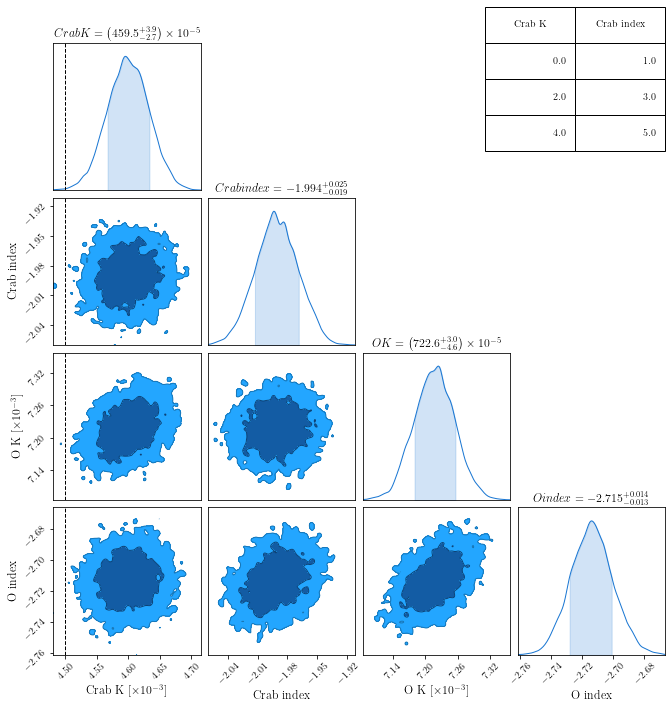

In [60]:
c = ChainConsumer()
chain = np.loadtxt('./chains/1-post_equal_weights.dat')
c.add_chain(chain, parameters=['Crab K', 'Crab index', 'O K', 'O index', '$z$'], name='fit')



fig = c.plotter.plot(filename="crab_parameter_fit.pdf", 
                    parameters=4,
                    truth={'Crab K':4.5e-3, 'Crab index':-2.08},
                    figsize="page",
                    log_scales=[])
a = np.linspace(0,5, 6).reshape((3,2))
table = plt.table(a,
                  bbox = [0.7,0.8,0.25,0.2],
                  transform=fig.transFigure,
                  colLabels=["Crab K", "Crab index"]
                  )


In [21]:
print(chain)

[[ 4.23558606e-03 -1.78301639e+00  6.69615783e-03 -2.35315514e+00
   4.16815151e+06]
 [ 4.46629186e-03 -1.99461287e+00  6.78787912e-03 -2.40727564e+00
   4.16815272e+06]
 [ 4.85638485e-03 -1.87768173e+00  6.77895519e-03 -2.75678891e+00
   4.16815299e+06]
 ...
 [ 4.73828501e-03 -1.90870378e+00  7.27288163e-03 -2.56721451e+00
   4.16816137e+06]
 [ 4.80528291e-03 -1.89801730e+00  7.14927515e-03 -2.53161464e+00
   4.16816088e+06]
 [ 4.61569573e-03 -1.86387701e+00  6.91445417e-03 -2.59356087e+00
   4.16816088e+06]]


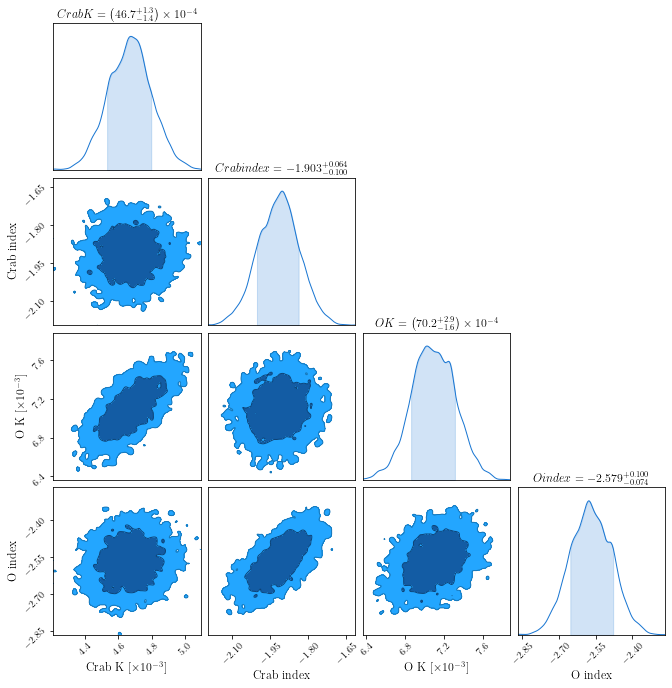

In [29]:
fig = c.plotter.plot(parameters=4, figsize="page")